<a href="https://colab.research.google.com/github/Rupesh0Poudel/Numerical_Introductory_Seminar/blob/main/Random_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


First, we start with John von Neumann's Middle Square digits

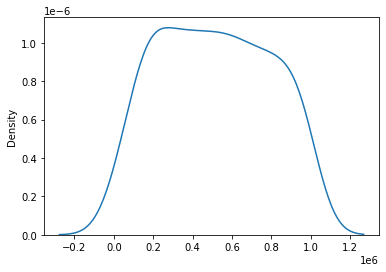

In [66]:
# Middle Square Digits Algorithm

seed = 675248
def random():
    global seed
    #square the number
    s = str(seed ** 2)
    #if  squared number is less than twice the seed length
    while len(s) != 12:
        s = "0" + s
        #add a padding before the number until it reaches twice the seed length
    seed = int(s[3:9])
    return seed
U1 = []
for i in range(0,211):
    U1.append(random())

sns.kdeplot(U1)

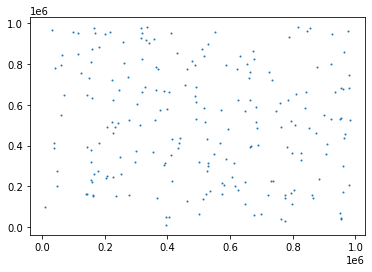

In [127]:
#scatterplot for middle square digits algorithm
plt.scatter(U1[1:210], U1[2:211], s=10 )

In [67]:
#Dynamic Middle Square Digits for four digits. 
seed_number = int(input("Please enter a four-digit number:\n[####] "))
number = seed_number
already_seen = set()
counter = 0

while number not in already_seen:
    counter += 1
    already_seen.add(number)
    number = int(str(number * number).zfill(8)[2:6])  # zfill adds padding of zeroes
    print(f"#{counter}: {number}")

print(f"We began with {seed_number} and"
      f" have repeated ourselves after {counter} steps"
      f" with {number}.")

Please enter a four-digit number:
[####] 2222
#1: 9372
#2: 8343
#3: 6056
#4: 6751
#5: 5760
#6: 1776
#7: 1541
#8: 3746
#9: 325
#10: 1056
#11: 1151
#12: 3248
#13: 5495
#14: 1950
#15: 8025
#16: 4006
#17: 480
#18: 2304
#19: 3084
#20: 5110
#21: 1121
#22: 2566
#23: 5843
#24: 1406
#25: 9768
#26: 4138
#27: 1230
#28: 5129
#29: 3066
#30: 4003
#31: 240
#32: 576
#33: 3317
#34: 24
#35: 5
#36: 0
#37: 0
We began with 2222 and have repeated ourselves after 37 steps with 0.


Now, we generate some uniformly distributed random numbers using LCGs. First, the linear congruential generator that has the form:

$X_{i+1} = (aX_i + c) Mod \: m, \; i = 0,1,2... $

In [132]:
#Linear Congruential Generator
# C++ 11's minstd_rand0 follows modulus of 2^31 -1 , a of 7^5 = 16807 and c=0


def LCG(N,S):
  a = 7**5
  M = 2**31-1

  def fn(S):
    return (a*S) % M

  U2 = []

  for k in range(N):
    S = fn(S)
    U2 += [S/M]

  return U2



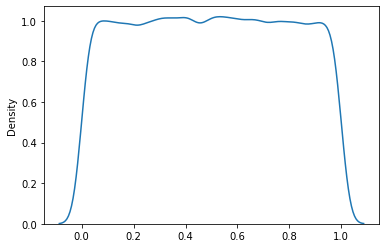

In [133]:

U2 = LCG(10**5, 123)

sns.kdeplot(U2)

#10 million uniform random number generation and kdeplot took 1 minutes 18 seconds 

[0.33678944610841083,
 0.42022074406045523,
 0.6500454240711617,
 0.3134423640153568,
 0.02581200610185601,
 0.8223865538939771,
 0.8508112960731663,
 0.5854531017064364,
 0.7102803800768593,
 0.6823479517746475]

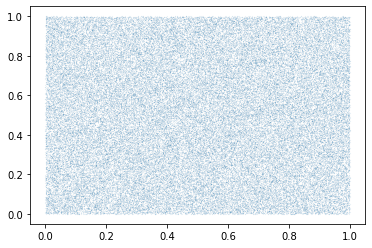

In [137]:
# Scatterplot for the Linear Congruential Generator
plt.scatter(U2[1:99999], U2[2:100000], s=0.001 )
# s sets the size of the dots.thicker dots may fill the space, and not for the reason we want
U2[99990:100000]
#This check is so that we know that the random number is not repating in the end of our generation

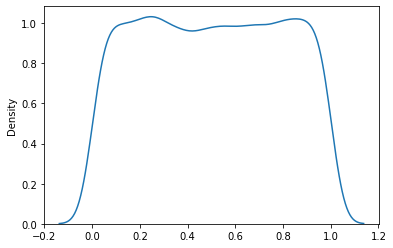

In [115]:
#Lagged Fibonacci Generator For Uniform Random Numbers

# parameter settings
nn   = 18
a    = 1366
b    = 150889
M    = 714025
seed = 123456
n    = 10**4
yy = []
yy.append(seed)   
i    = 1

# Main computation
while i <= nn:
    yy.append( (a * yy[i - 1] + b) % M)
    i  = i + 1

y = [x / M for x in yy]
i=19

while i <= n + 18:
    zeta = y[i - 12] - y[i - 5]
    if zeta < 0:
        zeta = zeta + 1
    
    y.append(zeta)
    i = i + 1

U3   = y[19:n + 18]
n1  = n - 2
n2  = n - 1

sns.kdeplot(U3) 


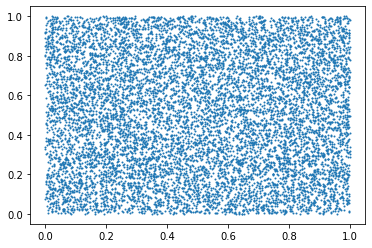

In [116]:
# If we wish to see the first number on the list with respect to second number 
#on the list and so on, scatterplot does that
plt.scatter(U3[1:n1], U3[2:n2], s=1 )

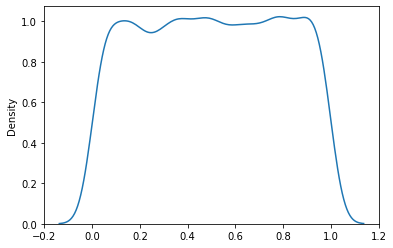

In [138]:
#Random number using the numpy command
U4 = []
U4 = np.random.uniform(0,1,10**4)
sns.kdeplot(U4)
# 10 million observation for numpy and kdeplot took 1 minutes 11 seconds


array([0.85178066, 0.48096199, 0.73641172, 0.36712548, 0.39245466,
       0.14897856, 0.10617731, 0.27059009, 0.35710725, 0.07132845])

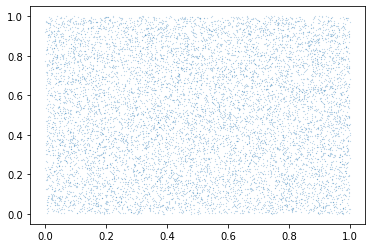

In [140]:
# Scatterplot for numpy default uniform random number generator
plt.scatter(U4[1:10**4-1], U4[2:10**4], s=0.01 )
U4[9990:10000]
# s sets the size of the dots.thicker dots may fill the space, and not for the reason we want

I have generated random number in 4 different ways: the middle square digits, the linear congruential generator, the lagged fibonacci generator, and default numpy uniform random number generator. 

Now, I will store these random numbers into U1, U2, U3, and U4 respectively. 

Thereafter, I will try to convert these uniformly distributed random sequence of numbers into normally distributed random sequence of numbers. The conversion method are as follows:

1.   Box Müller Method
2.   Marsaglia Method
3.   Inverse Method


In addition, I will also generate random sequence of normally distributed numbers using Numpys' default random number generator. 

In [ ]:
#